In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
sns.set_style("white")

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.regularizers import l1,l2,l1_l2

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
df_test = pd.read_csv('df_test.csv')
df_test

,5160399000.0,5160532000.0,5160665000.0,5160798000.0,5160931000.0,5161064000.0,5161197000.0,5161330000.0,5161463000.0,5161596000.0,...,5178354000.0,5178487000.0,5178620000.0,5178753000.0,5178886000.0,5179019000.0,5179152000.0,5179285000.0,5179418000.0,target
0,2.950901,0.902424,3.609979,3.055115,4.036279,5.421765,5.709461,5.342877,5.316088,4.677352,...,4.535670,5.781560,5.968084,5.393829,4.983120,4.697924,2.387842,1.606726,0.182691,0
1,3.031936,3.011295,4.798773,5.328106,4.714895,6.324241,6.342548,4.747849,4.850721,4.482862,...,5.628841,6.765914,7.336272,7.453834,5.646930,4.853823,4.431760,4.068731,3.125760,0
2,6.530953,8.500089,12.586018,12.204521,10.663135,11.833899,14.070092,14.178874,12.044108,11.868625,...,11.027771,11.312739,13.174208,13.844385,11.373266,11.034321,10.539037,11.887417,10.584875,0
3,3.164263,5.529422,7.753607,6.913345,8.067882,8.296607,9.290557,7.724988,7.805755,7.959184,...,6.416645,5.814830,6.985933,8.193748,7.569565,8.249093,6.622108,5.638334,6.400860,0
4,8.386093,9.840102,12.134753,12.547019,12.631717,14.261529,13.987828,12.428510,10.985325,10.450608,...,12.186491,12.201777,14.507222,15.508496,13.201510,12.297471,11.698099,13.270782,11.070101,0
5,6.023662,11.058970,13.498687,10.400385,11.516341,13.994253,14.812970,13.592376,11.068720,10.359941,...,12.384987,11.421519,12.508307,13.805166,13.402535,12.459557,11.105112,11.641913,7.829498,0
6,11.855904,9.914749,11.850813,11.484727,12.554704,13.287239,12.812065,11.279834,9.964271,10.473292,...,11.888719,12.026691,14.322939,14.720829,13.583829,12.520845,10.796050,11.873114,10.827345,0
7,3.936545,8.210159,10.308178,9.670616,13.864596,14.127773,16.216343,15.077238,11.596483,12.203186,...,11.634393,11.355016,14.057089,15.128881,14.111677,14.175338,11.606353,12.873405,10.783709,0
8,7.094536,5.655632,8.893394,8.212312,10.392735,9.836021,10.882961,9.272468,8.711961,9.024563,...,9.418217,8.841332,10.676582,10.525266,10.156544,9.622389,7.725622,8.338539,7.338725,0
9,13.265439,10.537382,12.862325,10.062306,12.105781,15.105871,15.638883,13.266718,11.191602,10.314122,...,12.659743,10.854548,14.215042,15.054139,13.448993,12.928502,11.392657,12.206523,8.899485,0


In [4]:
df_test = df_test.T
# df_med = df_med.T
# df_small = df_small.T
# df_smaller = df_smaller.T

In [5]:
sequences = list()
for i in range(df_test.shape[1]):
    values = df_test.iloc[:-1,i].values
    sequences.append(values)
targets = df_test.iloc[-1, :].values

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(targets)
encoded_y = encoder.transform(targets)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
targets = dummy_y

In [7]:
X_test, y_test = sequences, targets

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.externals.joblib import dump, load
sc1 = load('std_scaler_smooth.bin')
X_test = sc1.transform(X_test)

# sc2 = load('std_scaler_med.bin')
# X_test_med = sc2.transform(X_test_med)

# sc3 = load('std_scaler_small.bin')
# X_test_small = sc3.transform(X_test_small)

# sc4 = load('std_scaler_smaller.bin')
# X_test_smaller = sc4.transform(X_test_smaller)

/home/hongyu/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
X_test.shape

(1692, 144)

In [10]:
X_test_ = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
y_test.argmax(axis=1)

array([ 0,  0,  0, ..., 17, 17, 17])

In [12]:
class Model:
    def __init__(self, path_model, path_weight):
        self.model = self.loadmodel(path_model, path_weight)
        self.graph = tf.get_default_graph()    
    
    @staticmethod
    def loadmodel(path_model, path_weight):
        json_file = open(path_model, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(path_weight)
        return model

    def predict(self, X):
        with self.graph.as_default():
            return self.model.predict(X)

In [13]:
work_dir_model = '/home/hongyu/Documents/Spring2020/ECE_research/signal_analysis/data_18points/3_section_sliding5/MSLSTM_models/'
work_dir_weight = '/home/hongyu/Documents/Spring2020/ECE_research/signal_analysis/data_18points/3_section_sliding5/MSLSTM_weights/'

# work_dir_model = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/models_mixed/'
# work_dir_weight = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/weights_mixed/'

In [14]:
# model_2sec = Model(work_dir_model + 'MSLSTM_wholetotwo_model.json', work_dir_weight + 'model-015-0.976846-0.930156-0.194448-wtt.h5')
model_cnn = Model(work_dir_model + 'CNN_18pts_smoothOnly.json', work_dir_weight + 'model-069-0.968699-0.926048-0.224999-cnn.h5')
model_lstm = Model(work_dir_model + 'LSTM_18pts_smoothOnly.json', work_dir_weight + 'model-016-0.984349-0.915366-0.288851-lstm.h5')
model_nn = Model(work_dir_model + 'NN_18pts_smoothOnly.json', work_dir_weight + 'model-004-0.928822-0.926869-0.225945-nn.h5')
# model_TopToNine = Model(work_dir_model + 'MSLSTM_toptonine_model.json', work_dir_weight + 'MSLSTM_toptonine_weight.h5')
# model_MiddleToSix = Model(work_dir_model + 'LSTM_MiddleToSix_model.json', work_dir_weight + 'LSTM_MiddleToSix_weight.h5')
# model_ButtomToNine = Model(work_dir_model + 'MSLSTM_buttomtonine_model.json', work_dir_weight + 'MSLSTM_buttomtonine_weight.h5')

# model_TopTopToThree = Model(work_dir_model + 'LSTM_TopTopToThree_model.json', work_dir_weight + 'LSTM_TopTopToThree_weight.h5')
# model_TopButtomToThree = Model(work_dir_model + 'LSTM_TopButtomToThree_model.json', work_dir_weight + 'LSTM_TopButtomToThree_weight.h5')

# model_MiddleTopToThree = Model(work_dir_model + 'LSTM_MiddleTopToThree_model.json', work_dir_weight + 'LSTM_MiddleTopToThree_weight.h5')
# model_MiddleButtomToThree = Model(work_dir_model + 'LSTM_MiddleButtomToThree_model.json', work_dir_weight + 'LSTM_MiddleButtomToThree_weight.h5')

# model_ButtomTopToThree = Model(work_dir_model + 'LSTM_ButtomTopToThree_model.json', work_dir_weight + 'LSTM_ButtomTopToThree_weight.h5')
# model_ButtomButtomToThree = Model(work_dir_model + 'LSTM_ButtomButtomToThree_model.json', work_dir_weight + 'LSTM_ButtomButtomToThree_weight.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
y_pred_cnn = model_cnn.predict(X_test_)
y_pred_lstm = model_lstm.predict(X_test_)
y_pred_nn = model_nn.predict(X_test)
# y_pred_TopToNine = model_TopToNine.predict([X_test_small, X_test_med, X_test_smaller, X_test_smooth][(y_pred_2sec.max(axis=1) > 0.00) & (y_pred_2sec.argmax(axis=1) == 0)])
# y_pred_MiddleToSix = model_MiddleToSix.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 1)])
# y_pred_ButtomToNine = model_ButtomToNine.predict([X_test_small, X_test_med, X_test_smaller, X_test_smooth][(y_pred_2sec.max(axis=1) > 0.00) & (y_pred_2sec.argmax(axis=1) == 1)])

In [16]:
# y_pred_TopTopToThree = model_TopTopToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 0)][(y_pred_TopToTwo.max(axis=1) > 0.85) & (y_pred_TopToTwo.argmax(axis=1) == 0)])
# y_pred_TopButtomToThree = model_TopButtomToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 0)][(y_pred_TopToTwo.max(axis=1) > 0.85) & (y_pred_TopToTwo.argmax(axis=1) == 1)])

# y_pred_MiddleTopToThree = model_MiddleTopToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 1)][(y_pred_MiddleToTwo.max(axis=1) > 0.85) & (y_pred_MiddleToTwo.argmax(axis=1) == 0)])
# y_pred_MiddleButtomToThree = model_MiddleButtomToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 1)][(y_pred_MiddleToTwo.max(axis=1) > 0.85) & (y_pred_MiddleToTwo.argmax(axis=1) == 1)])

# y_pred_ButtomTopToThree = model_ButtomTopToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 2)][(y_pred_ButtomToTwo.max(axis=1) > 0.85) & (y_pred_ButtomToTwo.argmax(axis=1) == 0)])
# y_pred_ButtomButtomToThree = model_ButtomButtomToThree.predict(X_test[(y_pred_3sec.max(axis=1) > 0.85) & (y_pred_3sec.argmax(axis=1) == 2)][(y_pred_ButtomToTwo.max(axis=1) > 0.85) & (y_pred_ButtomToTwo.argmax(axis=1) == 1)])

In [17]:
# len(y_pred_TopToNine), len(y_pred_ButtomToNine)

In [18]:
# len(y_pred_TopToNine) + len(y_pred_ButtomToNine)

In [19]:
len(y_pred_cnn), len(y_test)

(1692, 1692)

In [20]:
# y_pred_TopToNine.argmax(axis=1)

In [21]:
# y_test[(y_pred_2sec.max(axis=1) > 0.00) & (y_pred_2sec.argmax(axis=1) == 0)].argmax(axis=1)

In [22]:
# y_pred_ButtomToNine.argmax(axis=1)

In [23]:
# y_test[(y_pred_2sec.max(axis=1) > 0.00) & (y_pred_2sec.argmax(axis=1) == 2)].argmax(axis=1)

In [24]:
# y_pred_BTN = y_pred_ButtomToNine.argmax(axis=1)
# y_pred_BTN[y_pred_BTN == 0] = 9
# y_pred_BTN[y_pred_BTN == 1] = 10
# y_pred_BTN[y_pred_BTN == 2] = 11
# y_pred_BTN[y_pred_BTN == 3] = 12
# y_pred_BTN[y_pred_BTN == 4] = 13
# y_pred_BTN[y_pred_BTN == 5] = 14
# y_pred_BTN[y_pred_BTN == 6] = 15
# y_pred_BTN[y_pred_BTN == 7] = 16
# y_pred_BTN[y_pred_BTN == 8] = 17
# y_pred_BTN

In [25]:
# y_pred_final = np.concatenate((y_pred_TopToNine.argmax(axis=1), y_pred_BTN), axis=0)

In [26]:
# y_pred_final, len(y_pred_final)

In [27]:
# y_test_final = np.concatenate((y_test[(y_pred_3sec.max(axis=1) > 0.00) & (y_pred_3sec.argmax(axis=1) == 0)].argmax(axis=1), 
#                                y_test[(y_pred_3sec.max(axis=1) > 0.00) & (y_pred_3sec.argmax(axis=1) == 1)].argmax(axis=1), 
#                                axis=0)

In [28]:
y_pred_cnn

array([[1.82434861e-02, 2.87224740e-01, 4.52681584e-03, ...,
        1.66948012e-13, 1.06773657e-08, 6.28499638e-17],
       [9.74520504e-01, 5.56577975e-03, 9.98779107e-03, ...,
        1.11050365e-14, 1.52498625e-09, 2.85512886e-18],
       [9.99730885e-01, 1.77118069e-04, 1.49440302e-05, ...,
        6.88701014e-20, 2.47718275e-14, 3.09172228e-23],
       ...,
       [3.68799931e-35, 0.00000000e+00, 5.62361452e-27, ...,
        1.43670254e-12, 2.44688343e-24, 9.99731600e-01],
       [2.68494078e-26, 1.65645262e-29, 6.34912096e-24, ...,
        7.09704309e-14, 7.65839121e-30, 9.99478519e-01],
       [1.54125336e-27, 7.68058605e-31, 5.63839152e-23, ...,
        8.10308418e-12, 1.08164318e-27, 9.99195516e-01]], dtype=float32)

In [29]:
y_pred_cnn.argmax(axis=1)

array([ 5,  0,  0, ..., 17, 17, 17])

In [30]:
y_test.argmax(axis=1)

array([ 0,  0,  0, ..., 17, 17, 17])

In [31]:
len(y_test.argmax(axis=1))

1692

In [32]:
# len(set([1,1,1]))

In [45]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_cnn.argmax(axis=1), y_test.argmax(axis=1))
# matrix = confusion_matrix(y_pred_lstm.argmax(axis=1), y_test.argmax(axis=1))
# matrix = confusion_matrix(y_pred_nn.argmax(axis=1), y_test.argmax(axis=1))
# matrix = confusion_matrix(y_test[y_pred_2sec.max(axis=1) > 0.70].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) > 0.70].argmax(axis=1))
matrix

array([[88,  0,  3,  0,  0,  2,  2,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0],
       [ 1, 81,  1,  4,  0,  3,  4,  0,  0,  0,  0,  1,  0,  0,  3,  0,
         0,  0],
       [ 2,  2, 86,  0,  0,  6,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  2, 84,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  1, 81,  0,  0,  0,  5,  0,  1,  2,  0,  0,  0,  0,
         0,  0],
       [ 1,  1,  1,  2,  0, 81,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 2,  5,  0,  1,  0,  0, 86,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 94,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  6,  0,  0,  0, 75,  0,  3,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0, 92,  0,  0,  0,  0,  5,  0,
         0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0, 14,  0, 90,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  2,  1,  

In [36]:
len(y_test), len(y_test[y_pred_cnn.max(axis=1) > 0.70])

(1692, 1556)

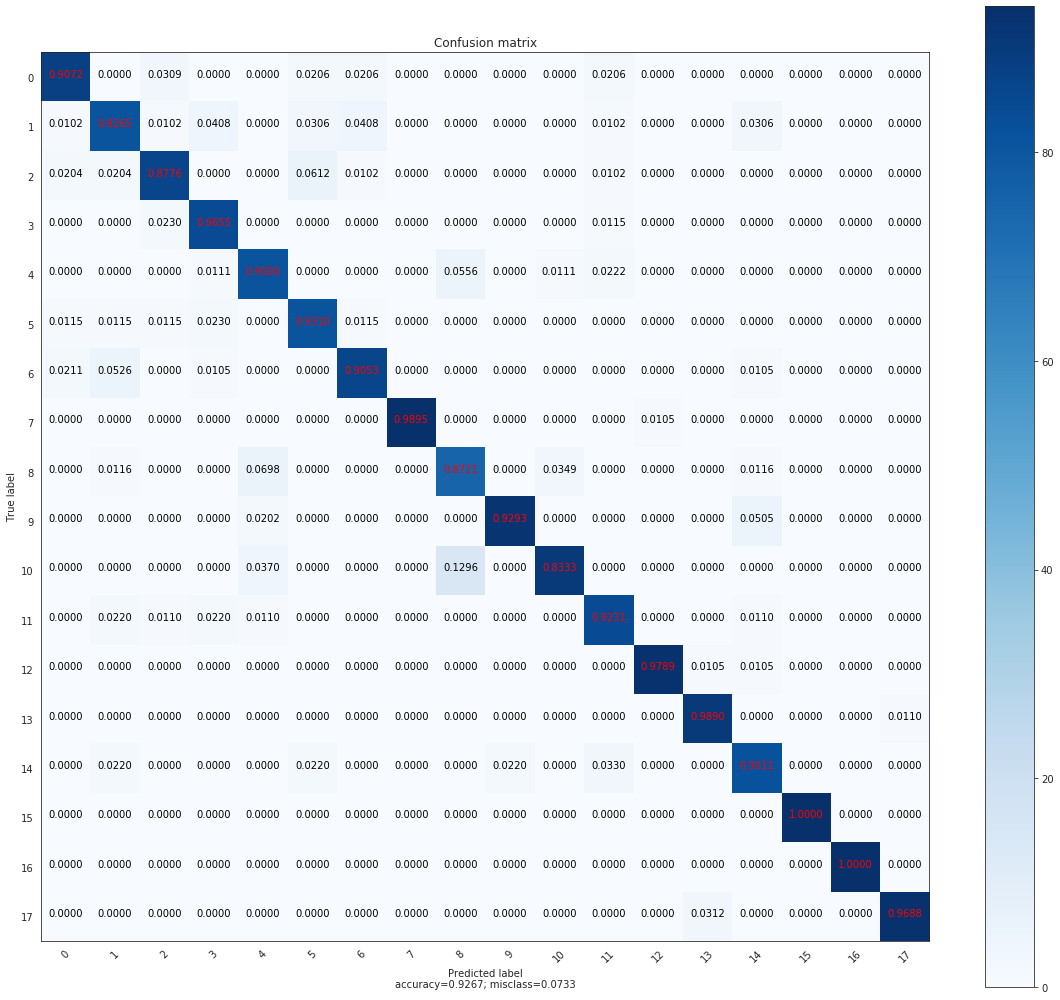

In [37]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage|
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

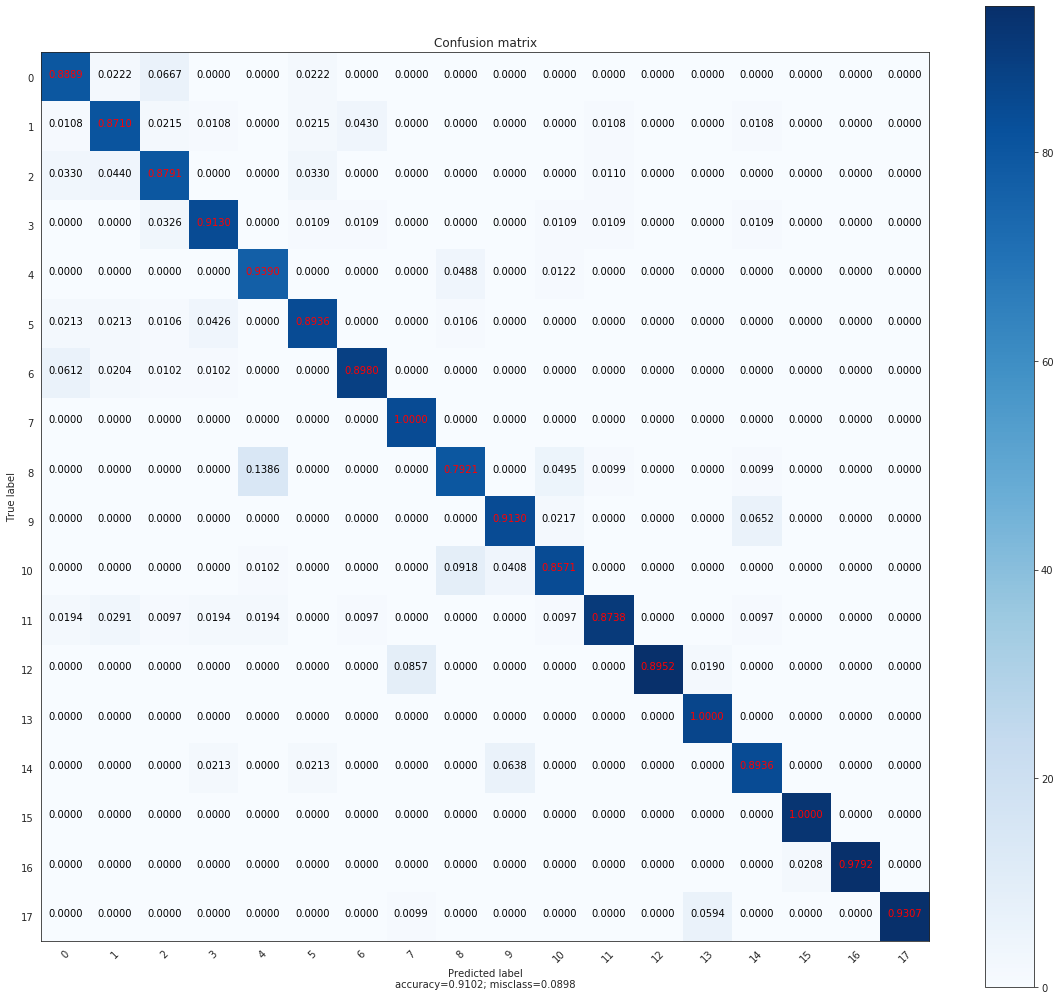

In [39]:
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

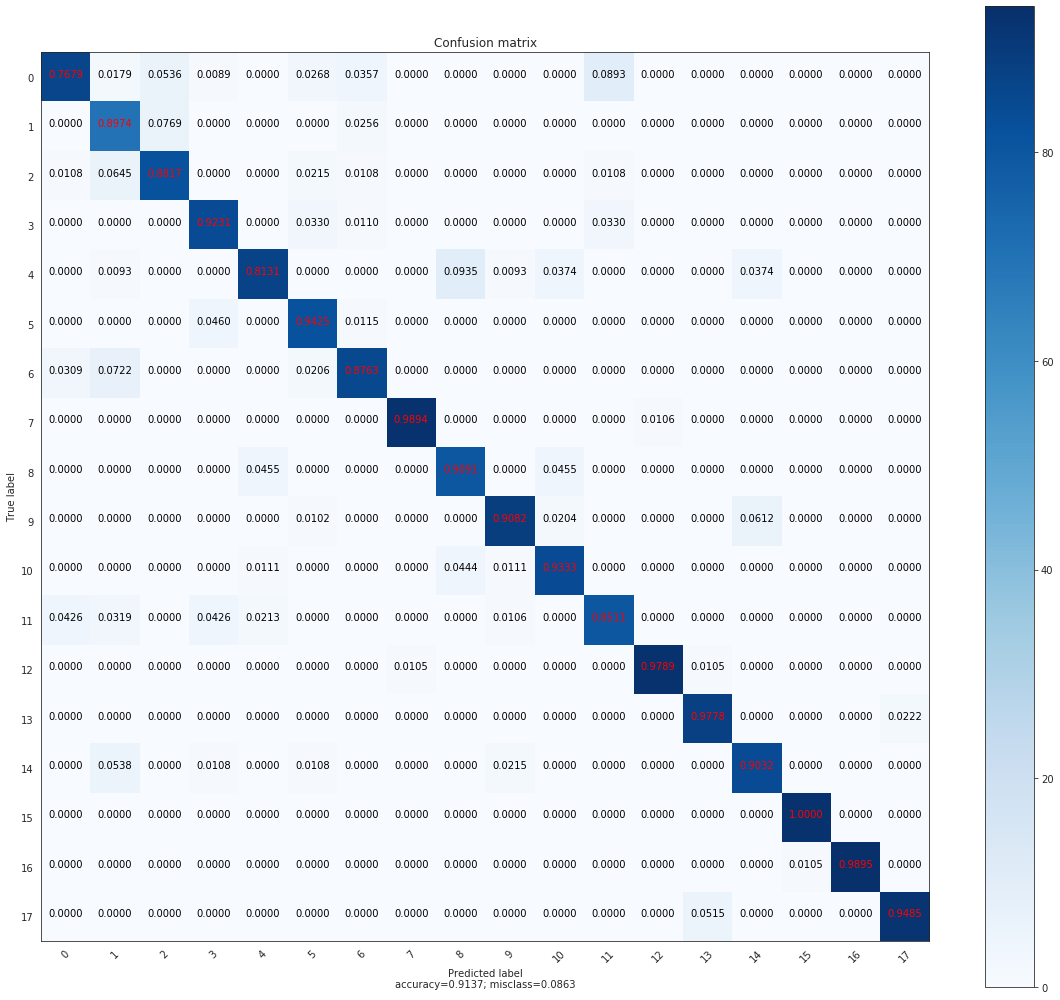

In [72]:
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [282]:
tl = np.sum(matrix[:9, :9])
tr = np.sum(matrix[:9, 9:])
bl = np.sum(matrix[9:, :9])
br = np.sum(matrix[9:, 9:])
(tl+br)/(tl+tr+bl+br)

0.9473995271867612

In [91]:
matrix[:9, :9]

array([[84,  5,  5,  2,  0,  1,  2,  0,  0],
       [ 1, 70,  4,  0,  0,  3,  2,  0,  0],
       [ 2,  3, 79,  0,  0,  1,  1,  0,  0],
       [ 0,  1,  0, 87,  0,  1,  3,  0,  0],
       [ 0,  0,  0,  0, 84,  0,  0,  0,  5],
       [ 0,  2,  0,  1,  0, 84,  0,  0,  0],
       [ 4,  7,  2,  1,  0,  1, 84,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 91,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 72]])

In [46]:
# matrix = confusion_matrix(y_pred_2sec.argmax(axis=1), y_test.argmax(axis=1))
# matrix = confusion_matrix(y_test[y_pred_2sec.max(axis=1) > 0.65].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) > 0.65].argmax(axis=1))
# matrix

FP = matrix.sum(axis=0) - np.diag(matrix)  
FN = matrix.sum(axis=1) - np.diag(matrix)
TP = np.diag(matrix)
TN = matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
# TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
# NPV = TN/(TN+FN)
# Fall out or false positive rate
# FPR = FP/(FP+TN)
# False negative rate
# FNR = FN/(TP+FN)
# False discovery rate
# FDR = FP/(TP+FP)
RECALL = sum(TPR)/18
PRECISION = sum(PPV)/18
# Overall accuracy
ACC = sum((TP+TN)/(TP+FP+FN+TN))/18
#     print(TPR, FPR)
F1 = sum((2 * TPR * PPV) / (TPR + PPV))/18
RECALL, PRECISION, F1, ACC

(0.9276772311795312,
 0.9267139479905437,
 0.9265490359548512,
 0.9918571053322827)